# 投资学精要笔记

## 收益风险权衡

试想一个收益为随机变量的投资机会，我们能对它说什么？我们可以衡量它的期望与方差，作为我们的期望收益与风险。由于我们通常是风险厌恶者，所以我们对于一项投资并不会只看其期望，而也会看其风险。而一群类似这样的人在市场上进行交易，就形成了用风险去换取期望的规律。当一项投资被看做对于其预期收益来说风险太低，就会有更多人买入，从而使其价格上升（如股票价格）而收益下降，而如果一项投资被看做收益的诱惑抵消不了其风险，就会更多卖出而价格下降，从而使收益上升。这种收益可以看成是股利或者定期（风险）收益型的投资，虽然对于持有人来说价格下跌应当反而是他的资本利得为负，但他若能预料到这一点并进行卖空，反而能大赚一遍。事实上，对于资本利得/套利来说，价格变动的源头，即错误定价总可以利用各种工具设法获取利润。

## 超额收益与夏普比率

作为风险厌恶者而，诸如国库券的无风险资产之所以没有购成资产组合的全部，正是因为我们还偏好超出其利率的超额收益。我们可以使用夏普比率衡量一个单独的资产或资产组合的收益率。设$R_p$是组合回报率，$R_f$是无风险利率，夏普比率（Sharpen ratio）被定义为：

$$
SR = \frac{E(R_p) - R_f}{\sigma_{R_p}} \\
$$

夏普比率衡量了投资组合每一单位标准差所带来的超额收益。比如，若投资组合预期收益$E(R_p) = 12\%$,标准差$\sigma_{R_p}=6\%$则夏普比率$12\%/6%=2$反映了每1%标准差可以带来2%的超额收益。

## 分散如何降低风险

使用概率论的语言可以更精确的诠释何谓“不要把鸡蛋放在一个篮子里”。

设有投资机会A与投资机会B，它们的收益率为

$$
A \sim N(12\%,36\%^2) \\
B \sim N(12\%,36\%^2)
$$

A与B独立（带来相关系数$\rho=0$）

那么买入两份A与分别买入一份AB的收益情况情况如何？

$$
2A \sim N(24\%,144\%^2) \\
A + B \sim N(24\%,72\%^2)
$$

虽然两者的期望的确是一样的，但是从夏普比率和风险厌恶者的角度看，显然后者更优。事实上，考虑两个取值正好相反的随机变量（相关系数$\rho=-1$）。同时购入它们将保证收益的同时不需要承受任何风险。而取值一样的随机变量（相关系数$\rho=1$）则和把同一个资产买入两份没有区别。于是我们发现，只要两份投资的相关系数$\rho<1$，则相比起单独买入它们，我们总可以降低我们的风险而提升夏普比率。这就是不要把鸡蛋放到一个篮子里的原理。

我们给出一个《投资学精要》中的算例来可视化这一点。

设债券$r_B \sim N(6\%,144\%^2)$,股票基金$r_S \sim N(12\%,625\%^2)$,$\omega_B$为投资债券的比例，而$1-\omega_B = \omega_S$为投资股票的比例。于是对应于$\omega_B$的投资组合的收益率随机变量为
$$
r_P \sim N \left(\omega_B 6\% + (1-\omega_B) 12\%, \omega_B 144\%^2 + (1-\omega_B) 625\%^2 \right) \\
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline


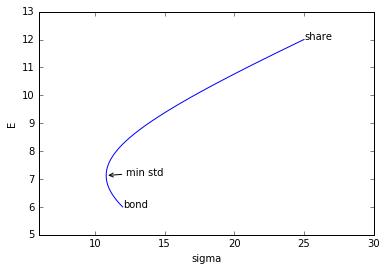

In [2]:
omega = np.linspace(1.0,0.0,1000)
E = omega * 6 + (1 - omega) * 12
sigma = np.sqrt(omega**2 * 144 + (1 - omega)**2 * 625)

index = sigma.argmin()

plt.plot(sigma, E)
plt.xlabel("sigma")
plt.ylabel("E")
plt.xlim(6,30)
plt.ylim(5,13)
plt.annotate('bond',xy = (12,6))
plt.annotate("share",xy= (25,12))
plt.annotate("min std",xy = (sigma[index], E[index]),arrowprops=dict(arrowstyle="->"),textcoords='offset points',xytext=(20, 0))

从上图中我们可以看出最小标准差点，然而此点并不一定是夏普比率最高的点。事实上，将无风险利率作为y轴上的一个点，与此投资机会组合曲线的切点才是最高夏普比率的点。而这个点随无风险利率的位置改变而改变。

如假设无风险利率$r_f=4\%$，则最优解为

In [3]:
index4 = ((E - 4)/sigma).argmax()
index4

index2 = ((E - 2)/sigma).argmax()
index2

index5t = ((E - 5.75)/sigma).argmax()
index5t

851

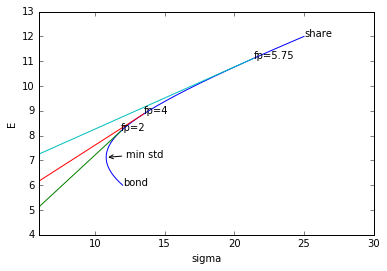

In [4]:
plt.plot(sigma, E)
plt.plot([0,sigma[index2]],[2,E[index2]])
plt.plot([0,sigma[index4]],[4,E[index4]])
plt.plot([0,sigma[index5t]],[5.75,E[index5t]])

plt.xlabel("sigma")
plt.ylabel("E")
plt.xlim(6,30)
plt.ylim(4,13)
plt.annotate('bond',xy = (12,6))
plt.annotate("share",xy= (25,12))
plt.annotate("min std",xy = (sigma[index], E[index]),arrowprops=dict(arrowstyle="->"),textcoords='offset points',xytext=(20, 0))
plt.annotate('fp=2',xy = (sigma[index2],E[index2]))
plt.annotate("fp=4",xy= (sigma[index4],E[index4]))
plt.annotate('fp=5.75',xy = (sigma[index5t],E[index5t]))

另一方面，两个投资具有不同的相关系数时也会得到不同的投资组合曲线。上面是独立或者说$\rho=0$的情况。$\rho$取其他值的情况见下图。
$$
r_P \sim N \left(\omega_B 6\% + (1-\omega_B) 12\%, \omega_B 144\%^2 + (1-\omega_B) 625\%^2 + 2 \rho \omega_B(1 - \omega_B) 3\%^2 \right)
$$

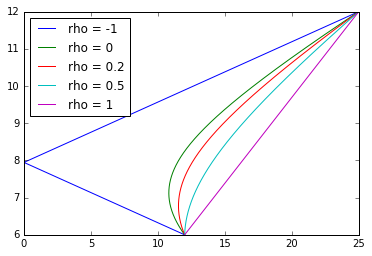

In [5]:
def E_sigma(rho):
    omega = np.linspace(1.0,0.0,1000)
    E = omega * 6 + (1 - omega) * 12
    sigma = np.sqrt(omega**2 * 144 + (1 - omega)**2 * 625 + 2 * rho * omega * (1 - omega) * 12 * 25 )
    return E,sigma

rho_l = [-1,0,0.2,0.5,1]
E_l,sigma_l = zip(*[E_sigma(rho) for rho in rho_l])

for index,rho in enumerate(rho_l):
    plt.plot(sigma_l[index],E_l[index],label="rho = {}".format(rho))
plt.legend(loc = "best")

## 纯技术分析与风险厌恶的分离

回到投资组合曲线上的切线，注意到这些切线上每一点都对应一个相同的夏普比率。同时每一点还对应一个无风险资产与有风险资产最佳组合的比率。于是在相同（最优）的夏普比率下，我们根据我们真正的风险偏好选择这条切线上的某点决策，这是因人而异的，投资分析的目的在于给出这个资产组合曲线以及那个切线，这是纯技术纯客观的，至于我们的心灵或者顾客选择这条切线上的哪一点，则是另一回事。

在完全无风险投资组合和最优风险组合的线段中选一点吧。

## 有效边界

为了简化说明，之前只在两个投资中进行权衡。事实上，若我们有n项投资机会，分别建模为$X \sim N(\mu,\Sigma)$,$X$为n维正态分布向量。则我们也想要选出一个最优风险投资组合$\beta$，使得
$$
r_P = X\beta \\
max_{\beta} \frac{E(r_P) - r_f}{\sigma(r_P)}
$$
然后和上面一样提供一条完全无风险投资组合到最优风险投资组合的插值直线给我们的下一步处理或客户做决断。
当$n=2$时，分析和上面直观的分析一样。当$n>2$时，下面我们可以展示这种方法也可以得出类似资产组合曲线的有效边界。再后有效边界又可以结合不同的无风险利率产生不同的最优风险投资组合，从而插值生成那个决策用的直线。

In [6]:
import scipy.stats as stats

In [7]:
n1 = stats.norm(0,1)
n2 = stats.norm(1,2)

np.cov([1,1,1,2],[2,2,2,4])

array([[ 0.25,  0.5 ],
       [ 0.5 ,  1.  ]])

In [8]:
def E_beta(mu,Sigma,beta):
    return np.dot(mu,beta)

def var_beta(mu,Sigma,beta):
    return np.dot(np.dot(beta,Sigma),beta)

def sigma_beta(mu,Sigma,beta):
    return np.sqrt(var_beta(mu,Sigma,beta))

def mu_Sigma_seq(seq_list):
    mu = np.average(seq_list,axis=1)
    Sigma = np.cov(seq_list)
    return mu,Sigma

In [9]:
mat = [[4,3,5,4,5,6,7,5,6,6,5,7,8],[5,4,5,6,7,6,7,8,5,7,6,8,9],[7,5,4,4,5,5,6,4,3,5,4,2,3]]

In [10]:
mu,Sigma = mu_Sigma_seq(mat)

In [11]:
mu

array([ 5.46153846,  6.38461538,  4.38461538])

In [12]:
Sigma

array([[ 1.93589744,  1.47435897, -0.77564103],
       [ 1.47435897,  2.08974359, -0.74358974],
       [-0.77564103, -0.74358974,  1.75641026]])

In [13]:
E_beta(mu,Sigma,[0.0,1.0,0.0])

6.384615384615385

In [14]:
var_beta(mu,Sigma,[0,1,0])

2.0897435897435899

In [15]:
E_beta(mu,Sigma,[0.0,0.5,0.5])

5.384615384615385

In [16]:
var_beta(mu,Sigma,[0,0.5,0.5])

0.58974358974358987

In [17]:
(E_beta(mu,Sigma,[0.0,1.0,0.0]) - 2)/np.sqrt(var_beta(mu,Sigma,[0,1,0]))

3.0330879419209302

In [18]:
(E_beta(mu,Sigma,[0.0,0.5,0.5]) - 2)/np.sqrt(var_beta(mu,Sigma,[0,0.5,0.5]))

4.4073517177415731

In [19]:
cons = ({'type' : 'ineq',
         'fun'  : lambda x : x},
        {'type' : 'ineq',
         'fun'  : lambda x : 1-x},
        {'type' : 'eq',
         'fun'  : lambda x : np.sum(x) - 1})

def func(mu,Sigma):
    def _func(beta):
        return var_beta(mu,Sigma,beta)
    return _func

result = minimize(  func(mu,Sigma),
                    [0.4,0.3,0.3],
                    constraints=cons,
                    method='SLSQP',
                    options={'disp': True})


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.492420497611
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4


In [20]:
beta = result.x

In [21]:
(E_beta(mu,Sigma,beta) - 2)/np.sqrt(var_beta(mu,Sigma,beta))

4.4315508864574014

In [22]:
np.sqrt(var_beta(mu,Sigma,beta))

0.70172679698783713

In [23]:
np.sqrt(var_beta(mu,Sigma,[0,0.5,0.5]))

0.7679476477883046

In [24]:
def cons_fix_E(mu,E):
    cons = ({'type' : 'ineq',
             'fun'  : lambda x : x},
            {'type' : 'ineq',
             'fun'  : lambda x : 1-x},
            {'type' : 'eq',
             'fun'  : lambda x : np.sum(x) - 1})
    return cons + ({ 'type'  : 'eq',
                     'fun'   : lambda x : np.dot(mu,x)-E},)
    
cons_fix_E_5 = cons_fix_E(mu,5)

result = minimize(  func(mu,Sigma),
                    [0.4,0.3,0.3],
                    constraints=cons_fix_E_5,
                    method='SLSQP',
                    options={'disp': False})


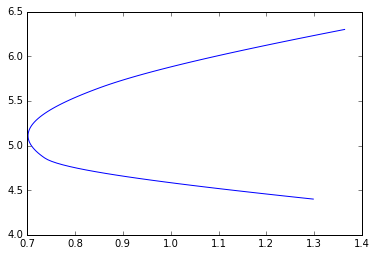

In [25]:
E_array = np.linspace(4.4,6.3,100)

beta_array = [minimize( func(mu,Sigma),
                        [0.4,0.3,0.3],
                        constraints=cons_fix_E(mu,E),
                        method='SLSQP',
                        options={'disp': False}).x for E in E_array]

sigma_array = [np.sqrt(var_beta(mu,Sigma,beta)) for beta in beta_array]

plt.plot(sigma_array,E_array)

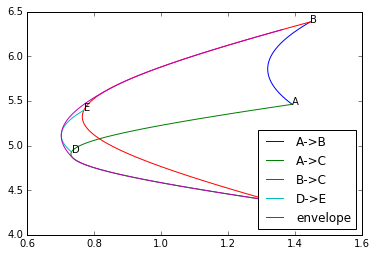

In [26]:
def interpolation(xArray, yArray, length = 100):
    return [k*np.array(xArray) + (1-k)*np.array(yArray) for k in np.linspace(0,1,length)]

def E_sigma_interpolation(xArray, yArray, length = 100):
    E_list = []
    sigma_list = []
    for beta in interpolation(xArray, yArray, length = length):
        E_list.append(E_beta(mu,Sigma,beta))
        sigma_list.append(sigma_beta(mu,Sigma,beta))
    return E_list, sigma_list

E_list1, sigma_list1 = E_sigma_interpolation([1,0,0],[0,1,0])
plt.plot(sigma_list1, E_list1,label="A->B")
E_list, sigma_list = E_sigma_interpolation([1,0,0],[0,0,1])
plt.plot(sigma_list, E_list,label='A->C')
E_list2, sigma_list2 = E_sigma_interpolation([0,1,0],[0,0,1])
plt.plot(sigma_list2, E_list2,label='B->C')
#E_list2, sigma_list2 = E_sigma_interpolation([0,1,0],[0,0,1])

beta1 = interpolation([1,0,0],[0,0,1],length = 100)[50]
beta2 = interpolation([0,1,0],[0,0,1],length = 100)[50]

E_list3, sigma_list3 = E_sigma_interpolation(beta1,beta2)
plt.plot(sigma_list3, E_list3,label="D->E")

plt.plot(sigma_array,E_array,label="envelope")

def mark(plt,text,beta):
    plt.annotate(text,xy = (sigma_beta(mu,Sigma,beta),E_beta(mu,Sigma,beta)))

mark(plt,"A",[1,0,0])
mark(plt,"B",[0,1,0])
mark(plt,"C",[0,0,1])
mark(plt,"D",beta1)
mark(plt,"E",beta2)

plt.xlim(0.6,1.6)
plt.legend(loc="best")

从上图中我们可以看到，在画出可能的三种投资组合的投资组合曲线后，我们可以选择较优额A->C与B->C两条曲线两个较优的点/投资组合再进行画一个投资组合曲线，从而使得可能不断向左上移动，也就说收益更大而风险更小。可以想象这样不断做下去，可以形成的一个极限曲线，这就是这个过程生成的包络线，即有效边界。我们试图从有效边界结合一个无风险利率来确定一个最优投资组合直线，与无风险资产线性合成而成，具体取该直线的哪个点，和上面一样，由我们的心理或客户需求决定，我们所做的只是通过技术，从一个标准正态分布（一个期望向量与一个协方差矩阵）中将其生成出来。

In [27]:
# 从一个期望向量与一个协方差矩阵中得到最优风险投资组合。该组合可以与无风险资产合成风险厌恶者的最优投资组合

def best_risk_invest(mu, Sigma, rf, sample_size = 100, beta0 = None):
    mu = np.array(mu)
    Sigma = np.array(Sigma)
    E_array = np.linspace(mu.min(),mu.max(),sample_size)
    if beta0 == None:
        beta0 = np.ones(len(mu))/len(mu)
    beta_array = [minimize( func(mu,Sigma),
                        beta0,
                        constraints=cons_fix_E(mu,E),
                        method='SLSQP',
                        options={'disp': False}).x for E in E_array]
    sigma_array = [np.sqrt(var_beta(mu,Sigma,beta)) for beta in beta_array]
    shapen_ratio_list = [(E_array[i] - rf)/sigma_array[i] for i in range(sample_size)]
    return beta_array[shapen_ratio_list.index(max(shapen_ratio_list))]

In [28]:
best_risk_invest(mu, Sigma, 0.2)

array([ 0.23235   ,  0.29913088,  0.46851911])

In [29]:
best_risk_invest([6,10], [[144,0.2*12*25],[0.2*12*25,625]], 5, sample_size = 500)

array([ 0.33066132,  0.66933868])

所以在最早那个债券/股票市场投资组合问题里最优风险组合就是33%的债券与67%的股票(5%无风险利率)。至于这个最优风险组合又如何与无风险资产组合是另一回事。